In [1]:
import pandas as pd
import numpy as np
import copy

# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

In [2]:
maze = gym.make('Maze5-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()

This is how maze looks like
<class 'tuple'>
('0', '1', '0', '1', '1', '1', '1', '1')

■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ □ □ □ □ □ $ ■
■ □ □ ■ □ ■ ■ □ ■
■ □ ■ □ □ □ □ □ ■
■ □ □ □ ■ ■ □ □ ■
■ □ ■ □ ■ □ □ ■ ■
■ □ ■ □ □ ■ □ □ ■
■ A □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


In [3]:
from lcs.agents.xcs import XCS
from lcs.agents.xcs import Configuration as XCSConfig
from lcs.agents.xncs import XNCS
from lcs.agents.xncs import Configuration as XNCSConfig

from utils.xcs_utils import *
from utils.nxcs_utils import *

XCScfg = XCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_maze_metrics)

XNCScfg_no_mods = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_maze_metrics,
                    lmc=10,
                    lem=100,
                    update_env_input = False,
                    cover_env_input = False,)

XNCScfg_update = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_maze_metrics,
                    lmc=10,
                    lem=100,
                    update_env_input = True,
                    cover_env_input = False,)

XNCScfg_cover = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_maze_metrics,
                    lmc=10,
                    lem=100,
                    update_env_input = False,
                    cover_env_input = True,)

XNCScfg_both = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_maze_metrics,
                    lmc=10,
                    lem=100,
                    update_env_input = True,
                    cover_env_input = True,)

In [4]:
from utils.xcs_utils import avg_experiment as XCSExp
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 10
explore = 1000
exploit = 1000
print("Starting XCS")
df = XCSExp(
    maze=maze,
    cfg=XCScfg,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=False
           )
print("Starting XNCS")
df_no_mods = XNCSExp(
    maze=maze,
    cfg=XNCScfg_no_mods,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=False
    )
print("Starting XNCS with enviromental input during cover")
df_cover = XNCSExp(
    maze=maze,
    cfg=XNCScfg_cover,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=False
    )
print("Starting XNCS with enviromental input during update")
df_update = XNCSExp(
    maze=maze,
    cfg=XNCScfg_update,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=False
    )
print("Starting XNCS with all enviromental inputs")
df_both = XNCSExp(
    maze=maze,
    cfg=XNCScfg_both,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=False

)

Starting XCS
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS with enviromental input during cover
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS with enviromental input during update
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experim

In [5]:
df_all = pd.DataFrame(df)

df_all['steps_in_trial_no_mods']=df_no_mods['steps_in_trial']
df_all['steps_in_trial_update'] =df_update['steps_in_trial']
df_all['steps_in_trial_cover']  =df_cover['steps_in_trial']
df_all['steps_in_trial_both']   =df_both['steps_in_trial']

df_all['population_no_mods']=df_no_mods['population']
df_all['population_update'] =df_update['population']
df_all['population_cover']  =df_cover['population']
df_all['population_both']   =df_both['population']

df_all['average_specificity_no_mods']=df_no_mods['average_specificity']
df_all['average_specificity_update']=df_update['average_specificity']
df_all['average_specificity_cover']=df_cover['average_specificity']
df_all['average_specificity_both']=df_both['average_specificity']

df_all['fraction_accuracy_no_mods']=df_no_mods['fraction_accuracy']
df_all['fraction_accuracy_update']=df_update['fraction_accuracy']
df_all['fraction_accuracy_cover']=df_cover['fraction_accuracy']
df_all['fraction_accuracy_both']=df_both['fraction_accuracy']

df_all['knowledge_no_mods']=df_no_mods['knowledge']
df_all['knowledge_update']=df_update['knowledge']
df_all['knowledge_cover']=df_cover['knowledge']
df_all['knowledge_both']=df_both['knowledge']

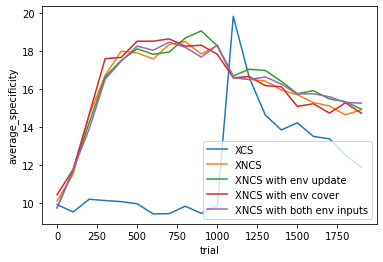

In [6]:
ax = df[['average_specificity',
         "average_specificity_no_mods",
         "average_specificity_update",
         "average_specificity_cover",
         "average_specificity_both"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

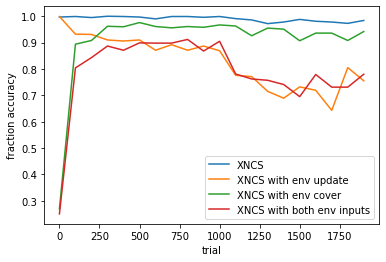

In [7]:
ax = df[["fraction_accuracy_no_mods",
         "fraction_accuracy_update",
         "fraction_accuracy_cover",
         "fraction_accuracy_both"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

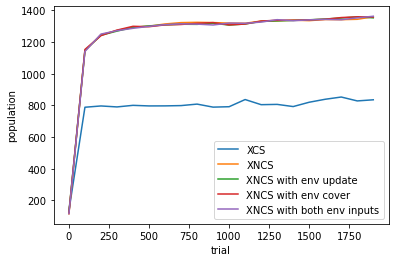

In [8]:
ax = df[['population',
         "population_no_mods",
         "population_update",
         "population_cover",
         "population_both",
        ]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

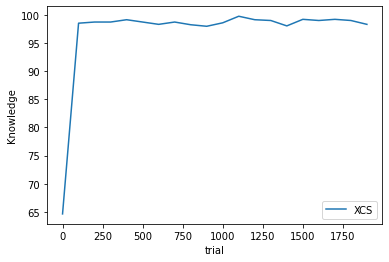

In [9]:
ax = df['knowledge'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("Knowledge")
ax.legend(["XCS"])

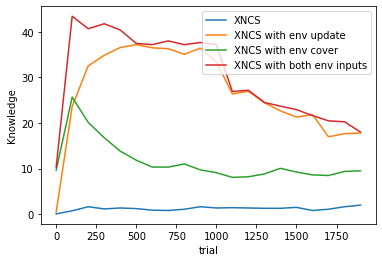

In [10]:
ax = df[["knowledge_no_mods",
         "knowledge_update",
         "knowledge_cover",
         "knowledge_both"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("Knowledge")
ax.legend(["XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

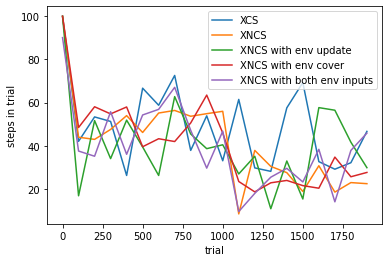

In [11]:
ax = df[['steps_in_trial',
         "steps_in_trial_no_mods",
         "steps_in_trial_update",
         "steps_in_trial_cover",
         "steps_in_trial_both",
        ]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

In [12]:
print(sum(df["steps_in_trial"])/number_of_experiments)
print(sum(df["steps_in_trial_no_mods"])/number_of_experiments)
print(sum(df["steps_in_trial_update"])/number_of_experiments)
print(sum(df["steps_in_trial_cover"])/number_of_experiments)
print(sum(df["steps_in_trial_both"])/number_of_experiments)

98.33000000000001
82.91999999999999
81.52000000000001
82.37000000000002
79.90999999999998


In [13]:
display(df)
display(df_no_mods)
display(df_update)
display(df_cover)
display(df_both)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,knowledge,steps_in_trial_no_mods,steps_in_trial_update,steps_in_trial_cover,...,average_specificity_cover,average_specificity_both,fraction_accuracy_no_mods,fraction_accuracy_update,fraction_accuracy_cover,fraction_accuracy_both,knowledge_no_mods,knowledge_update,knowledge_cover,knowledge_both
trial,,,,,,,,,,,,,,,,,,,,,
0,100.0,0.000000,0.066623,134.8,162.1,9.927346,64.657534,99.9,100.0,100.0,...,10.441932,9.780926,0.997,0.999,0.269,0.250,0.068493,0.479452,9.657534,10.342466
100,42.1,855.903763,0.410774,788.4,1600.0,9.537063,98.493151,44.0,16.9,48.5,...,11.777125,11.773937,0.999,0.932,0.894,0.804,0.753425,23.630137,25.684932,43.424658
200,53.4,718.279099,0.526575,796.5,1600.0,10.208813,98.698630,43.0,51.7,58.1,...,14.658562,13.895375,0.995,0.931,0.908,0.843,1.643836,32.534247,20.136986,40.684932
300,51.3,983.810372,0.473368,790.4,1600.0,10.140750,98.698630,47.6,34.1,54.8,...,17.607937,16.526875,1.000,0.910,0.962,0.887,1.164384,34.863014,16.780822,41.780822
400,26.3,1081.753536,0.256992,800.4,1600.0,10.084937,99.109589,54.0,51.9,58.0,...,17.675375,17.476562,0.999,0.906,0.960,0.871,1.369863,36.575342,13.835616,40.410959
500,66.7,751.010896,0.670094,796.7,1600.0,9.973937,98.698630,46.2,39.5,39.6,...,18.529937,18.268500,0.997,0.910,0.976,0.899,1.232877,37.191781,11.849315,37.465753
600,58.8,609.100632,0.590315,797.0,1600.0,9.437500,98.287671,55.2,26.3,43.3,...,18.530062,18.052688,0.990,0.871,0.961,0.898,0.890411,36.506849,10.342466,37.191781
700,72.6,600.000057,0.710829,798.8,1600.0,9.452437,98.698630,56.4,62.8,42.0,...,18.650437,18.478750,0.999,0.892,0.956,0.898,0.821918,36.301370,10.342466,38.013699
800,37.9,854.407442,0.376949,808.2,1600.0,9.844062,98.219178,53.7,45.5,50.6,...,18.263813,18.208625,0.999,0.871,0.961,0.912,1.095890,35.068493,11.027397,37.191781


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy,knowledge
trial,,,,,,,,
0,99.9,100.000000,0.078630,139.2,114.8,10.124785,0.997,0.068493
100,44.0,821.787296,0.696631,1600.0,1145.3,11.517875,0.999,0.753425
200,43.0,1013.522210,0.691476,1600.0,1246.2,14.626937,0.995,1.643836
300,47.6,770.532110,0.824009,1600.0,1273.4,16.727062,1.000,1.164384
400,54.0,802.742084,1.042410,1600.0,1293.4,18.000250,0.999,1.369863
500,46.2,955.142232,0.872478,1600.0,1299.9,17.915750,0.997,1.232877
600,55.2,802.625438,1.088972,1600.0,1314.3,17.590750,0.990,0.890411
700,56.4,818.630514,1.087348,1600.0,1322.8,18.359875,0.999,0.821918
800,53.7,658.836151,0.930983,1600.0,1324.6,18.509750,0.999,1.095890


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy,knowledge
trial,,,,,,,,
0,100.0,0.000000,0.076243,149.2,126.7,9.744346,0.999,0.479452
100,16.9,1044.742744,0.207257,1600.0,1147.5,11.702938,0.932,23.630137
200,51.7,872.170138,0.672214,1600.0,1242.9,14.219000,0.931,32.534247
300,34.1,1023.246093,0.456591,1600.0,1269.1,16.654000,0.910,34.863014
400,51.9,901.219403,0.701431,1600.0,1292.3,17.515625,0.906,36.575342
500,39.5,755.315325,0.545106,1600.0,1302.2,18.130187,0.910,37.191781
600,26.3,1085.896399,0.359202,1600.0,1308.5,17.841563,0.871,36.506849
700,62.8,806.530345,0.846488,1600.0,1312.6,17.958063,0.892,36.301370
800,45.5,870.880858,0.630338,1600.0,1311.7,18.694188,0.871,35.068493


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy,knowledge
trial,,,,,,,,
0,100.0,0.000000,0.066730,144.0,121.0,10.441932,0.269,9.657534
100,48.5,986.202015,0.601806,1600.0,1153.3,11.777125,0.894,25.684932
200,58.1,713.666159,0.758238,1600.0,1240.4,14.658562,0.908,20.136986
300,54.8,853.835843,0.769315,1600.0,1275.6,17.607937,0.962,16.780822
400,58.0,800.107765,0.798871,1600.0,1299.5,17.675375,0.960,13.835616
500,39.6,839.772991,0.548842,1600.0,1296.9,18.529937,0.976,11.849315
600,43.3,906.824886,0.631828,1600.0,1308.5,18.530062,0.961,10.342466
700,42.0,1025.764289,0.593249,1600.0,1310.9,18.650437,0.956,10.342466
800,50.6,822.627173,0.722391,1600.0,1318.3,18.263813,0.961,11.027397


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy,knowledge
trial,,,,,,,,
0,90.1,100.000000,0.060630,135.4,116.1,9.780926,0.250,10.342466
100,37.6,847.773775,0.423443,1600.0,1140.7,11.773937,0.804,43.424658
200,35.2,933.816302,0.436437,1600.0,1250.4,13.895375,0.843,40.684932
300,55.8,600.132786,0.705330,1600.0,1271.9,16.526875,0.887,41.780822
400,36.1,914.679402,0.468129,1600.0,1286.8,17.476562,0.871,40.410959
500,54.3,671.117570,0.706237,1600.0,1299.1,18.268500,0.899,37.465753
600,56.9,771.929558,0.735156,1600.0,1310.0,18.052688,0.898,37.191781
700,67.1,800.000033,0.876580,1600.0,1315.0,18.478750,0.898,38.013699
800,47.2,814.710485,0.599494,1600.0,1313.2,18.208625,0.912,37.191781
